✅ Dataset Loaded Successfully!
Shape of Dataset: (3276, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Summary Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.0925

<Figure size 1200x800 with 0 Axes>

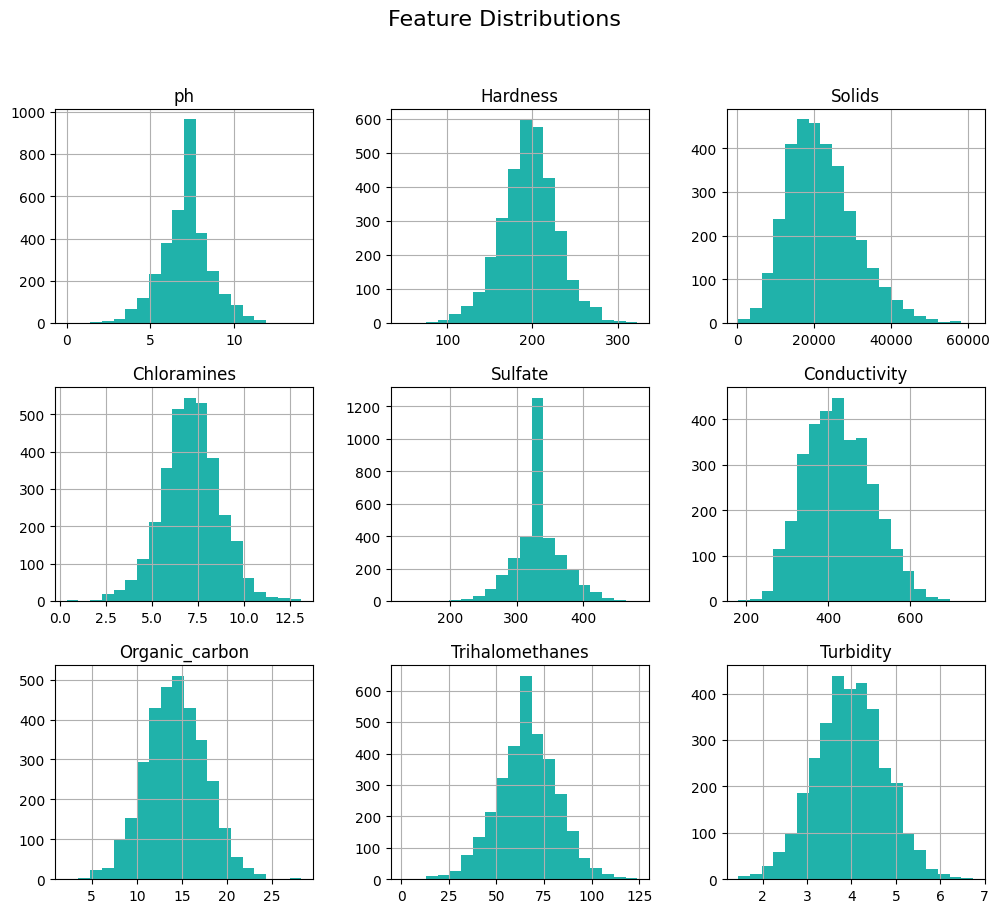

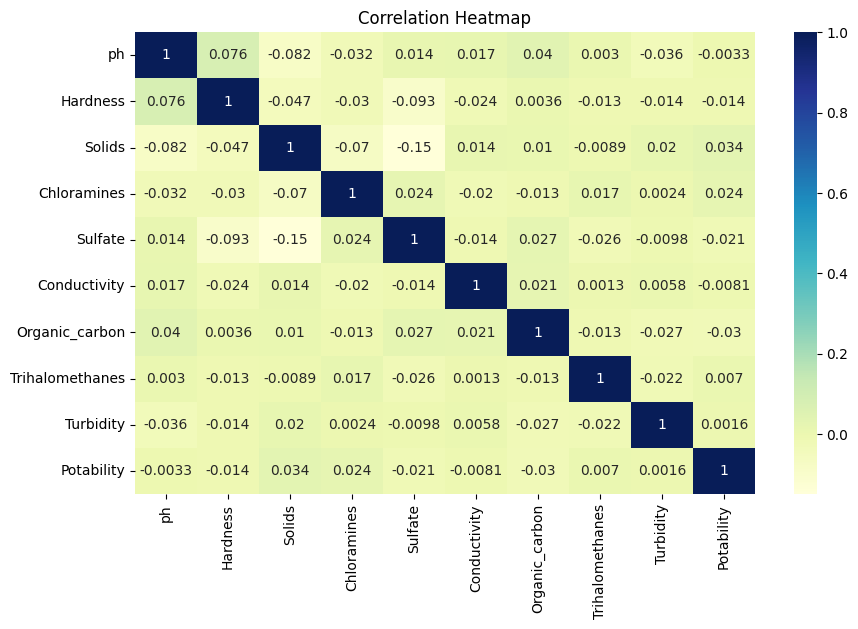

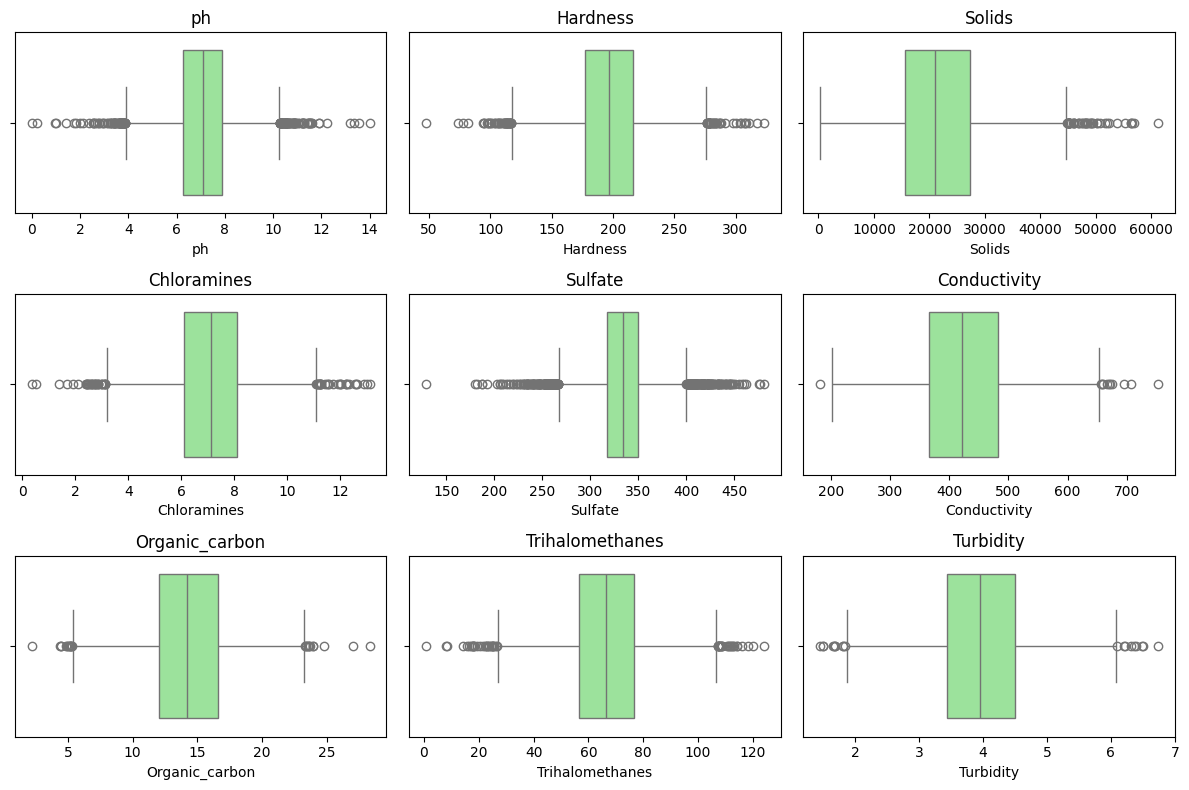


✅ Week 1 Insights:
- Dataset cleaned and ready for modeling.
- 'pH', 'Solids', and 'Sulfate' are most correlated with water potability.
- Balanced pH and low solids improve water safety.

💾 Cleaned dataset saved successfully as cleaned_water_data.csv


In [ ]:
# 💧 Water Quality Prediction Using AI
# Week 2 – Model Selection & Building

# -------------------------------------------------------------
# Step 1: Import Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------
# Step 2: Load Cleaned Dataset
# -------------------------------------------------------------
df = pd.read_csv("cleaned_water_data.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

# -------------------------------------------------------------
# Step 3: Split Data into Training and Testing
# -------------------------------------------------------------
X = df.drop("Potability", axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

# -------------------------------------------------------------
# Step 4: Train Multiple Models
# -------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# -------------------------------------------------------------
# Step 5: Compare Model Accuracies
# -------------------------------------------------------------
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color="teal")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# -------------------------------------------------------------
# Step 6: Evaluate Best Model (Random Forest)
# -------------------------------------------------------------
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------------------------------------
# Step 7: Insights
# -------------------------------------------------------------
print("""
✅ Week 2 Insights:
- Trained and compared 4 models.
- Random Forest achieved the best accuracy.
- Dataset ready for optimization in Week 3.
""")
